<a href="https://colab.research.google.com/github/HackSlash79/fashion-MNIST/blob/main/Fashion_MNISTKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from tensorflow.keras.datasets import fashion_mnist

In [6]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
y_test.shape

(10000,)

In [11]:
%matplotlib inline

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 2)

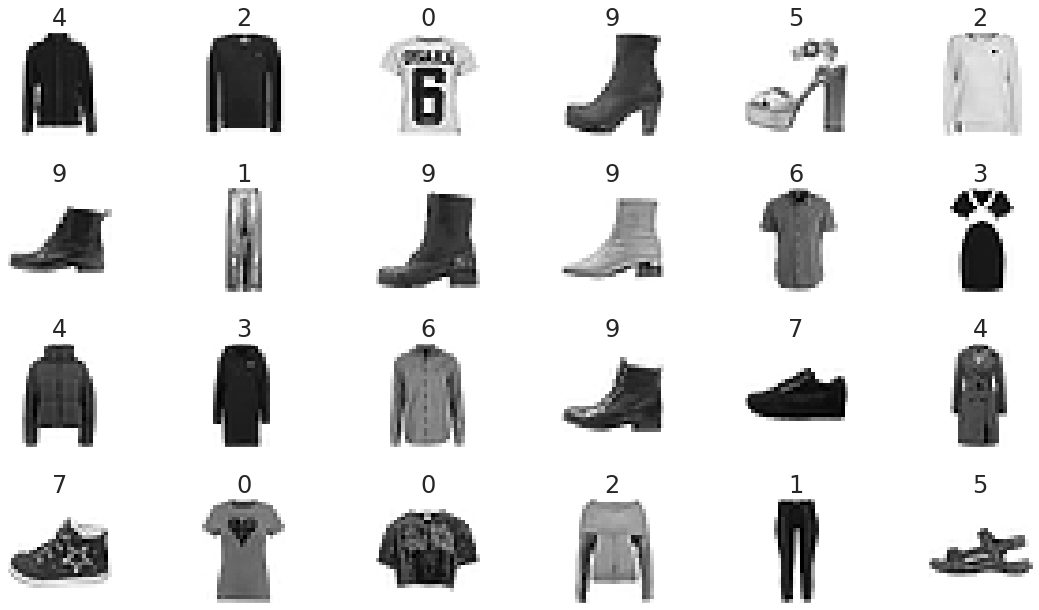

In [13]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols = 6, figsize= (16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
  axes, image, target = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([])
  axes.set_yticks([])
  axes.set_title(target)
plt.tight_layout()

In [14]:
X_train = X_train.reshape((60000, 28, 28, 1))

In [15]:
X_train.shape

(60000, 28, 28, 1)

In [16]:
X_test = X_test.reshape((10000, 28, 28, 1))

In [17]:
X_test.shape

(10000, 28, 28, 1)

In [18]:
X_train = X_train.astype('float32')

In [19]:
X_test = X_test.astype('float32')

In [20]:
from tensorflow.keras.utils import to_categorical

In [21]:
y_train = to_categorical(y_train)

In [22]:
y_train.shape

(60000, 10)

In [23]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [24]:
y_test = to_categorical(y_test)

In [25]:
y_test.shape

(10000, 10)

In [26]:
from tensorflow.keras.models import Sequential

In [27]:
cnn = Sequential()

In [28]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [29]:
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))

In [30]:
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [31]:
cnn.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))

In [32]:
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [33]:
cnn.add(Flatten())

In [34]:
cnn.add(Dense(units=128, activation='relu'))

In [35]:
cnn.add(Dense(units=10, activation='softmax'))

In [36]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [37]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
cnn.fit(X_train, y_train, epochs=5, batch_size = 64, validation_split = 0.1)

Epoch 1/5
844/844 [==============================] - 102s 120ms/step - loss: 0.7566 - accuracy: 0.8185 - val_loss: 0.3928 - val_accuracy: 0.8545
Epoch 2/5
844/844 [==============================] - 101s 120ms/step - loss: 0.3490 - accuracy: 0.8724 - val_loss: 0.3439 - val_accuracy: 0.8762
Epoch 3/5
844/844 [==============================] - 101s 119ms/step - loss: 0.2986 - accuracy: 0.8898 - val_loss: 0.3255 - val_accuracy: 0.8787
Epoch 4/5
844/844 [==============================] - 100s 119ms/step - loss: 0.2729 - accuracy: 0.8982 - val_loss: 0.3048 - val_accuracy: 0.8873
Epoch 5/5
844/844 [==============================] - 100s 119ms/step - loss: 0.2508 - accuracy: 0.9055 - val_loss: 0.3099 - val_accuracy: 0.8895


In [39]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.3188 - accuracy: 0.8854


In [40]:
predictions = cnn.predict(X_test)

In [41]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [42]:
for index, probability in enumerate(predictions[0]):
  print(f'{index}: {probability: .10%}')

0:  0.0000000006%
1:  0.0000002153%
2:  0.0000000148%
3:  0.0000000015%
4:  0.0000001100%
5:  0.0023374259%
6:  0.0000013882%
7:  0.0526325486%
8:  0.0000000238%
9:  99.9450266361%


In [43]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
  predicted, expected = np.argmax(p), np.argmax(e)

  if predicted != expected:
    incorrect_predictions.append(
        (i, images[i], predicted, expected)
    )

In [44]:
len(incorrect_predictions)

1146

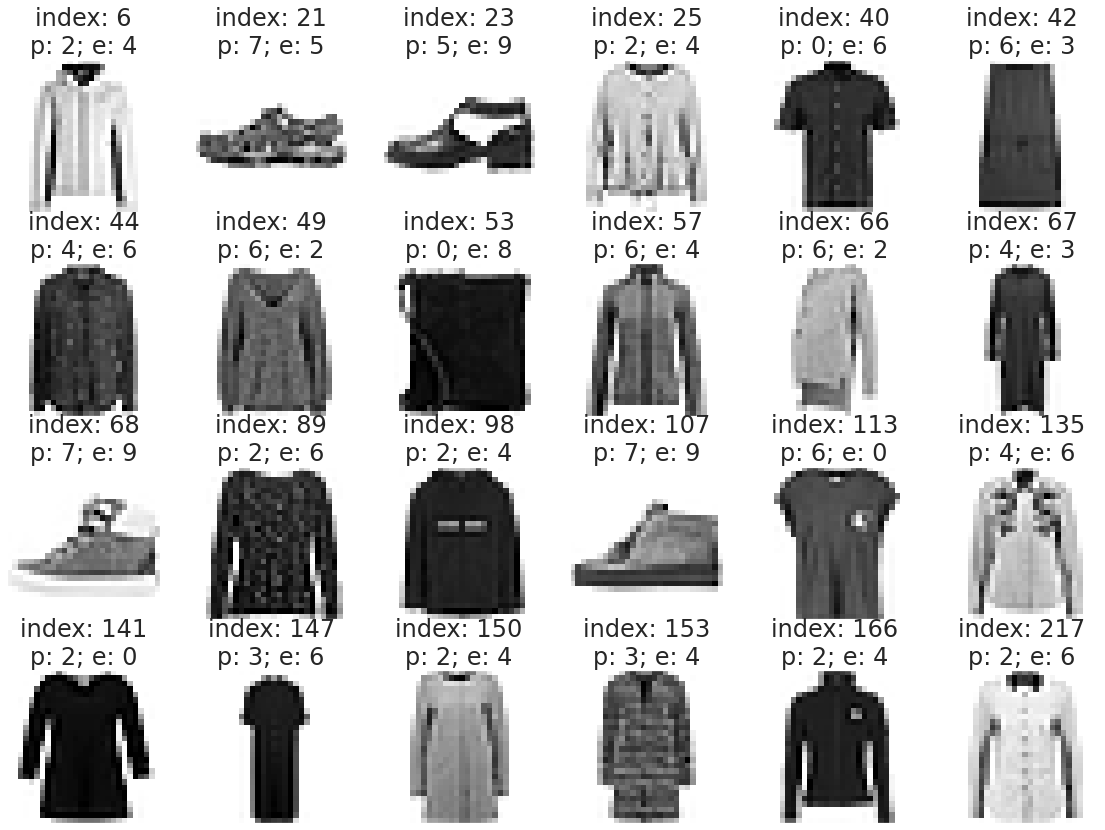

In [45]:
figure, axes = plt.subplots(nrows=4, ncols= 6, figsize= (16,12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
  index, image, predicted, expected = item
  axes.imshow(image, cmap= plt.cm.gray_r)
  axes.set_xticks([])
  axes.set_yticks([])
  axes.set_title(
      f'index: {index}\np: {predicted}; e: {expected}')
  
  plt.tight_layout()
  